In [4]:
import numpy as np
import pandas as pd

In [7]:
df=pd.read_csv("spam.csv", encoding='latin-1')

In [8]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1992,spam,Free tones Hope you enjoyed your new content. ...,NaN,NaN,NaN
1248,ham,HI HUN! IM NOT COMIN 2NITE-TELL EVERY1 IM SORR...,NaN,NaN,NaN
4569,spam,Wanna have a laugh? Try CHIT-CHAT on your mobi...,NaN,NaN,NaN
4654,ham,Our Prasanth ettans mother passed away last ni...,NaN,NaN,NaN
5140,ham,Yeah I imagine he would be really gentle. Unli...,NaN,NaN,NaN


In [9]:
df.shape

(5572, 5)

In [11]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Model evaluation
# 6. Improvements on model

## 1. Data Cleaning

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [13]:
#Drop last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [14]:
df.sample(5)

,v1,v2
1656,ham,Yes I posted a couple of pics on fb. There's s...
66,ham,"Today is \song dedicated day..\"" Which song wi..."
5083,ham,Aiya we discuss later lar... Pick Ì_ up at 4 i...
2535,ham,Can you pls pls send me a mail on all you know...
1804,ham,The bus leaves at &lt;#&gt;


In [15]:
#Renaming the columns v1 and v2
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [16]:
df.sample(5)

,target,text
3346,ham,No problem baby. Is this is a good time to tal...
3893,spam,Dear Dave this is your final notice to collect...
333,ham,Any chance you might have had with me evaporat...
2229,ham,haha but no money leh... Later got to go for t...
788,spam,"5 Free Top Polyphonic Tones call 087018728737,..."


In [17]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [19]:
df['target']=encoder.fit_transform(df['target'])

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [22]:
#Check for duplicate values
df.duplicated().sum()

403

In [23]:
#remove duplicates
df=df.drop_duplicates(keep='first')

In [24]:
df.duplicated().sum()

0

In [26]:
df.shape

(5169, 2)

## 2. EDA

In [27]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [29]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

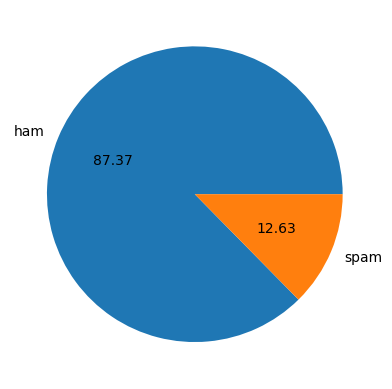

In [32]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [33]:
#Data is imbalanced towards ham
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BODHAN\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [37]:
#number of characters
df['num_characters']=df['text'].apply(len)

In [38]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [42]:
#number of words
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [43]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [44]:
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [45]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [47]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [48]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [49]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


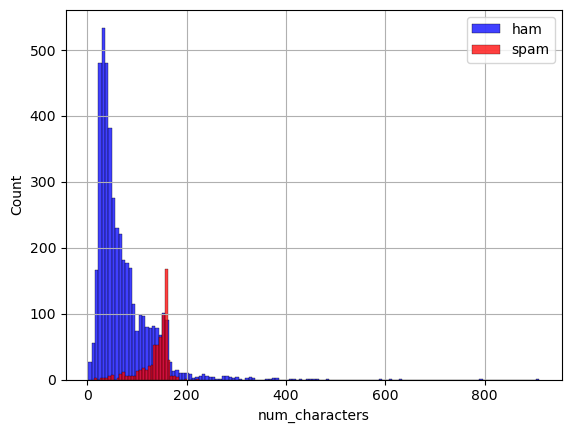

In [61]:
import seaborn as sns
sns.histplot(df[df['target']==0]['num_characters'],color='blue',label='ham')
sns.histplot(df[df['target']==1]['num_characters'],color='red',label='spam')
plt.legend()
plt.grid()

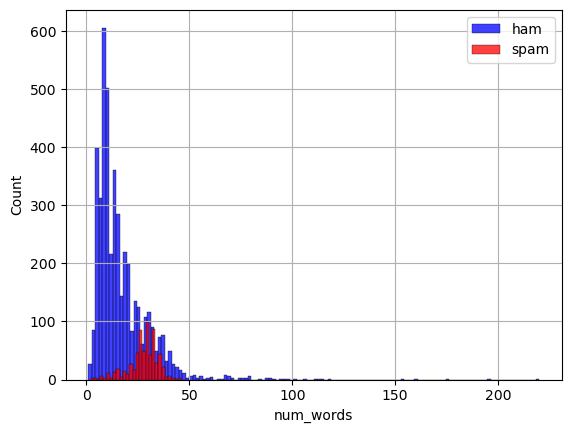

In [62]:
sns.histplot(df[df['target']==0]['num_words'],color='blue',label='ham')
sns.histplot(df[df['target']==1]['num_words'],color='red',label='spam')
plt.legend()
plt.grid()

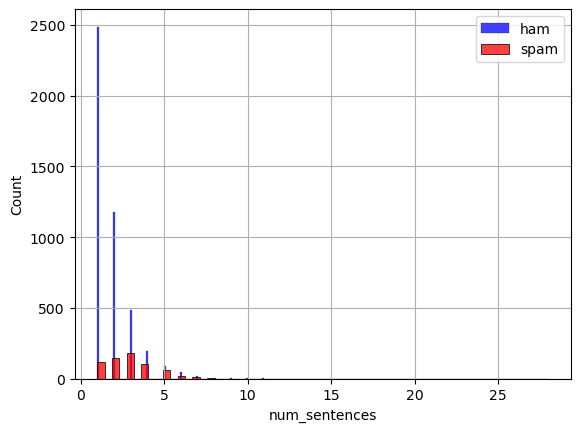

In [63]:
sns.histplot(df[df['target']==0]['num_sentences'],color='blue',label='ham')
sns.histplot(df[df['target']==1]['num_sentences'],color='red',label='spam')
plt.legend()
plt.grid()

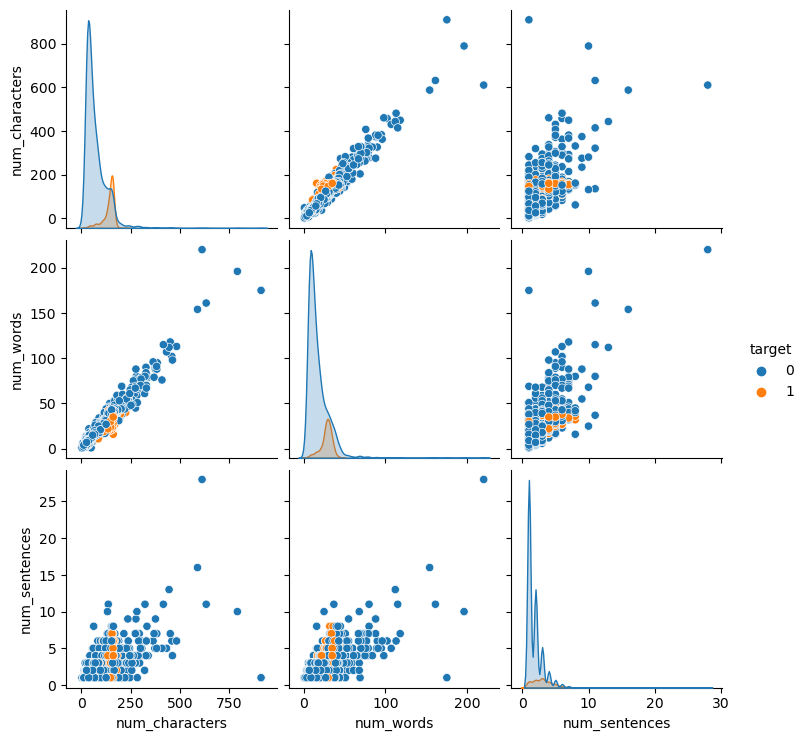

In [64]:
sns.pairplot(df,hue='target')

In [66]:
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

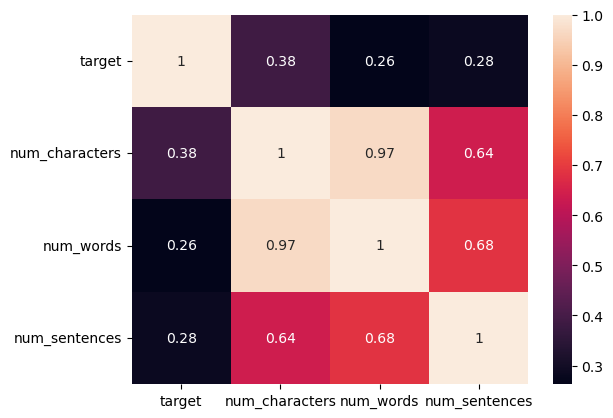

In [68]:
sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing

* Lower Case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [70]:
def LowerCase_text(text):
    text = text.lower()
    return text

In [71]:
def Tokenize_text(text):
    text = nltk.word_tokenize(text)
    return text

In [86]:
def Remove_special_chars(text):
    str=[]
    for word in text:
        if word.isalnum():
            str.append(word)
    
    text=str[:]
    str.clear()
    for word in text:
        if word not in stopwords.words('english') and word not in string.punctuation:
            str.append(word)

    return str

In [94]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

def Stem_data(text):
    str=[]
    for word in text:
        str.append(ps.stem(word))
    
    return " ".join(str)

In [95]:
def Preprocess_data(text):
    text=LowerCase_text(text)
    text=Tokenize_text(text)
    text=Remove_special_chars(text)
    text=Stem_data(text)
    return text

In [98]:
df['transformed_text']=df['text'].apply(Preprocess_data)

In [99]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [105]:
from wordcloud import WordCloud
wc= WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [106]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

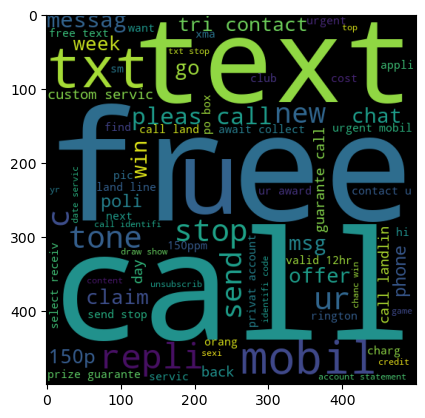

In [107]:
plt.imshow(spam_wc)

In [109]:
ham_wc= wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

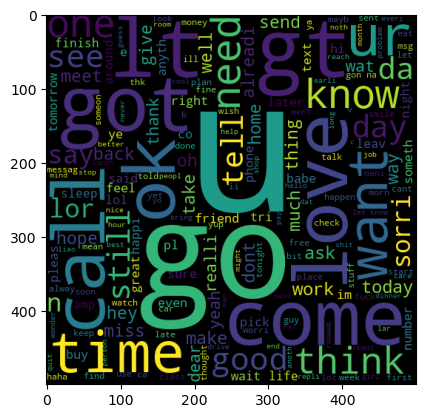

In [110]:
plt.imshow(ham_wc)

In [111]:
spam_corpus=[]
for sentence in df[df['target']==1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_corpus.append(word)

C:\Users\BODHAN\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

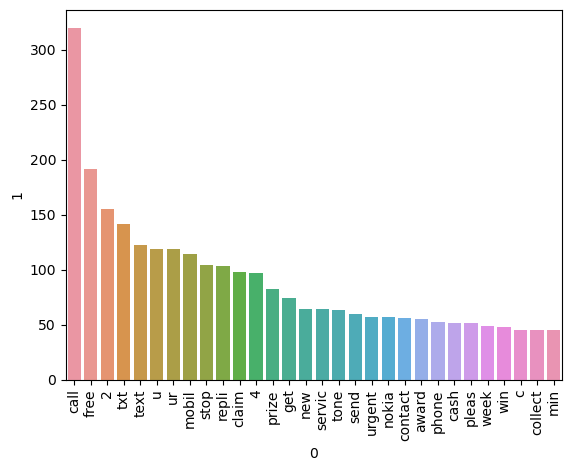

In [117]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

In [121]:
ham_corpus=[]
for sentence in df[df['target']==0]['transformed_text'].tolist():
    for word in sentence.split():
        ham_corpus.append(word)

C:\Users\BODHAN\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

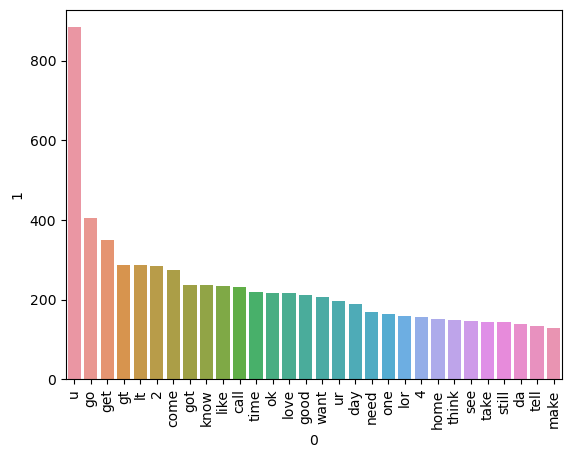

In [122]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')

## 4. Model Building

In [166]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tfidf= TfidfVectorizer()

In [167]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [168]:
X.shape

(5169, 6708)

In [169]:
y=df['target'].values

In [170]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [173]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [174]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [175]:
gnb.fit(X_train,Y_train)
y_pred1= gnb.predict(X_test)

In [176]:
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [177]:
mnb.fit(X_train,Y_train)
y_pred2= mnb.predict(X_test)

In [178]:
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [179]:
bnb.fit(X_train,Y_train)
y_pred3= bnb.predict(X_test)

In [180]:
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [182]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [183]:
X.shape

(5169, 6708)

In [184]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [187]:
gnb.fit(X_train,Y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(Y_test,y_pred1))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [190]:
#Model result with the best precision score
mnb.fit(X_train,Y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(Y_test,y_pred2))
print(confusion_matrix(Y_test,y_pred2))
print(precision_score(Y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [191]:
bnb.fit(X_train,Y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(Y_test,y_pred3))
print(confusion_matrix(Y_test,y_pred3))
print(precision_score(Y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [211]:
#Compare with other classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2,use_label_encoder=False,eval_metric='error')

In [212]:
clfs = {
    
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'XGB' : xgb
}

In [213]:
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
    clf.fit(X_train,Y_train)
    y_pred= clf.predict(X_test)
    precision = precision_score(Y_test,y_pred)
    accuracy = accuracy_score(Y_test,y_pred)
    
    return precision, accuracy

In [214]:
precision_scores=[]
accuracy_scores=[]

for name,clf in clfs.items():
    precision, accuracy= train_classifier(clf,X_train,Y_train,X_test,Y_test)
    precision_scores.append(precision)
    accuracy_scores.append(accuracy)

In [215]:
performance_df= pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [220]:
performance_df=performance_df.sort_values(by='Precision', ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.973888,1.000000
8,ETC,0.975822,0.982906
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
10,XGB,0.969052,0.934426
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595
